In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d_types = {
    'year' : 'int16',
    'mileage' : 'int16',
    'vol_engine' : 'int16',
    'price' : 'int16'
}

In [3]:
df = pd.read_csv("Data/Car_Prices_Poland_Kaggle.csv", dtype=d_types).drop(["Unnamed: 0","generation_name"], axis=1)

In [4]:
df.isnull().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [5]:
df.describe()

,year,mileage,vol_engine,price
count,117927.000000,117927.000000,117927.000000,117927.000000
mean,2012.925259,171.667320,1812.057782,3621.296446
std,5.690135,18055.421569,643.613438,19392.380417
min,1945.000000,-32768.000000,0.000000,-32759.000000
25%,2009.000000,-14608.000000,1461.000000,-13680.500000
50%,2013.000000,5.000000,1796.000000,8900.000000
75%,2018.000000,15000.000000,1995.000000,19600.000000
max,2022.000000,32765.000000,7600.000000,32764.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        117927 non-null  object
 1   model       117927 non-null  object
 2   year        117927 non-null  int16 
 3   mileage     117927 non-null  int16 
 4   vol_engine  117927 non-null  int16 
 5   fuel        117927 non-null  object
 6   city        117927 non-null  object
 7   province    117927 non-null  object
 8   price       117927 non-null  int16 
dtypes: int16(4), object(5)
memory usage: 5.4+ MB


In [7]:
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,8496,1248,Diesel,Janki,Mazowieckie,-29636
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,12965
2,opel,combo,2015,16293,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,-17936,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,-28072,1400,CNG,Tarnowskie Góry,Śląskie,-29636


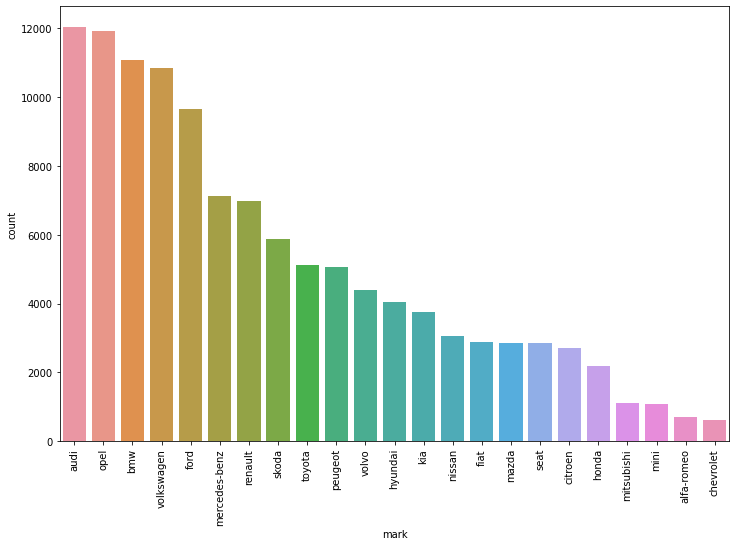

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['mark'], order=df['mark'].value_counts().index)
plt.xticks(rotation=90);

In [9]:
categorical_columns = df.columns[df.dtypes == "object"]

In [10]:
numerical_columns = df.columns[df.dtypes != "object"]

In [11]:
[print(i, '=' ,len(df[i].unique())) for i in categorical_columns];

mark = 23
model = 328
fuel = 6
city = 4427
province = 23


In [12]:
categorical_columns = categorical_columns.drop(["model","city"])

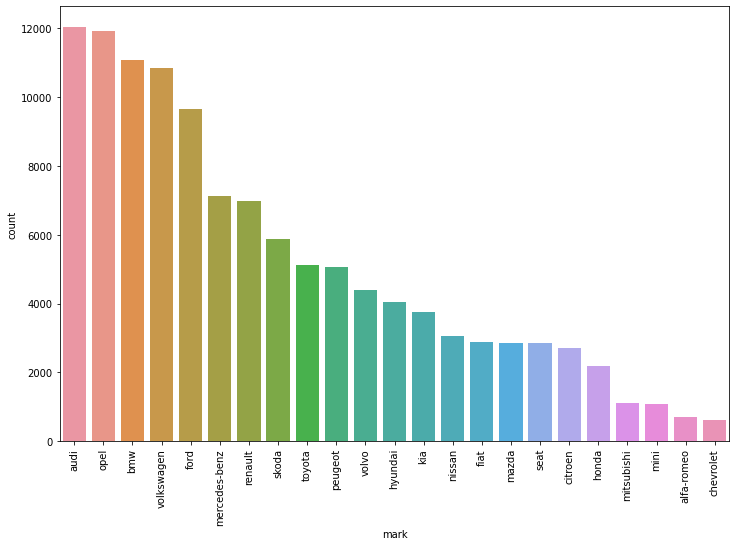

In [13]:
pd.DataFrame([np.unique(df[i],return_counts=True) for i in categorical_columns][0]).transpose()
plt.figure(figsize=(12,8))
sns.countplot(x = df['mark'], order=df['mark'].value_counts().index)
plt.xticks(rotation=90);

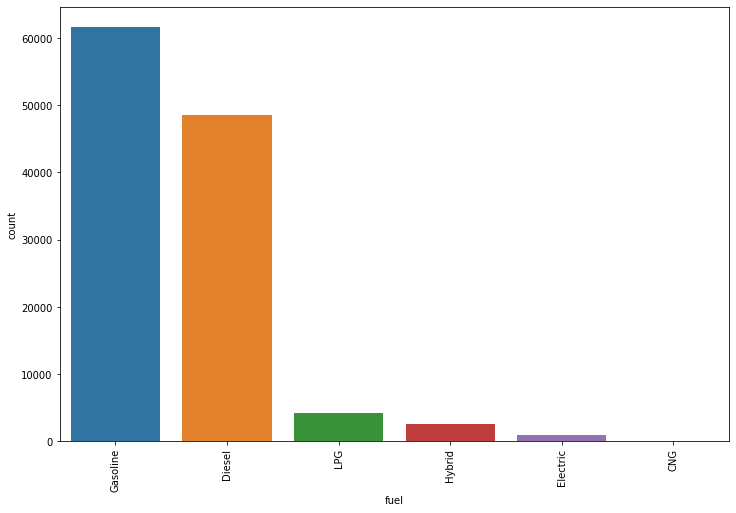

In [14]:
pd.DataFrame([np.unique(df[i],return_counts=True) for i in categorical_columns][1]).transpose()
plt.figure(figsize=(12,8))
sns.countplot(x = df['fuel'], order=df['fuel'].value_counts().index)
plt.xticks(rotation=90);

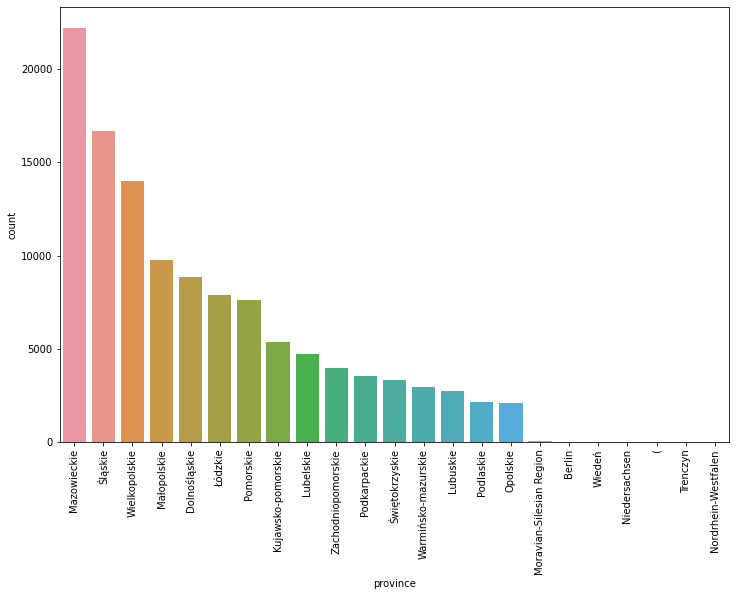

In [15]:
pd.DataFrame([np.unique(df[i],return_counts=True) for i in categorical_columns][2]).transpose()
plt.figure(figsize=(12,8))
sns.countplot(x = df['province'], order=df['province'].value_counts().index)
plt.xticks(rotation=90);

In [16]:
df = pd.get_dummies(df)

In [18]:
df.shape

(117927, 4811)

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop("price", axis=1)
y = df["price"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rfc = RandomForestRegressor()

In [26]:
rfc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = rfc.predict(x_test)